In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# consider a set of N color images each is I pixels high and J pixels wide
# each pixel is indexed by its row i and column j within the image and has red, green, and blue values
# we have one value for each image
# so we represent an intensity value by a four dimensional array X with elements x[i,j,k,n]
# where i∈{1,...,I}, j∈{1,...,J} index row and column within an image
# k∈{1,2,3} indexes the red, green, and blue color intensities
# n∈{1,...,N} indexes the image within the set of N
# this is called a tensor with four dimensions
# a one dimensional tensor is a vector
# a two dimensional tensor is a matrix

In [ ]:
imgSize = 20
image = torch.rand(imgSize, imgSize) # create a 20x20 image with random pixel values

def gaussian_kernel(size, sigma):
    ax = torch.arange(-size // 2 + 1., size // 2 + 1.) # one dimensional tensor, a coordinate axis
    xx, yy = torch.meshgrid(ax, ax) # create two dimensional grid of coordinates
    kernel = torch.exp(-(xx**2 + yy**2) / (2. * sigma**2)) # normal gaussian function
    return kernel / kernel.sum() # normalize the kernel (should sum to 1)

kernel_size = 5
sigma = 1.0
kernel = gaussian_kernel(kernel_size, sigma)

Text(0.5, 1.0, 'Gaussian Kernel')

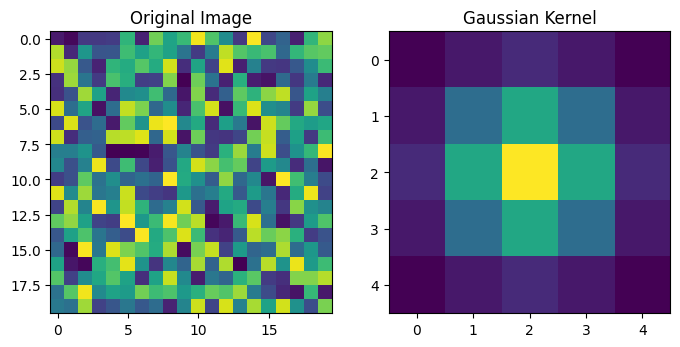

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(image)
ax[0].set_title('Original Image')

ax[1].imshow(kernel)
ax[1].set_title('Gaussian Kernel')

In [12]:
kernel_sum = torch.sum(kernel).item()
rounded_sum = round(kernel_sum, 2) # Round for printing
ax_coords = torch.arange(-kernel_size // 2 + 1., kernel_size // 2 + 1.) # Recreate ax to show its structure

print("Gaussian Kernel:\n", kernel.numpy())
print("Kernel Sum:", rounded_sum)
print("Kernel Shape:", kernel.shape)
print("Image Shape:", image.shape)
print("ax coordinates:", ax_coords.numpy())
print("ax shape:", ax_coords.shape)

Gaussian Kernel:
 [[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.05963429 0.09832033 0.05963429 0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.05963429 0.09832033 0.05963429 0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]
Kernel Sum: 1.0
Kernel Shape: torch.Size([5, 5])
Image Shape: torch.Size([20, 20])
ax coordinates: [-2. -1.  0.  1.  2.]
ax shape: torch.Size([5])
